### Imports

In [145]:
#Imports
import matplotlib.pyplot as plt
import numpy as np
from impedance.visualization import plot_nyquist, plot_altair
from impedance import preprocessing
from impedance.models.circuits import Randles, CustomCircuit

#### Get Data

In [2]:
frequencies_uncropped, Z_uncropped = preprocessing.readCSV('/Users/laurenfrank/impedance.py/data/exampleData.csv')

# keep only the impedance data in the first quandrant
frequencies, Z = preprocessing.ignoreBelowX(frequencies_uncropped, Z_uncropped)

### Testing


Circuit string: R_0-TDS_0
Fit: True

Constants:
    R_0 = 0.00e+00 [Ohm]

Initial guesses:
  TDS_0_0 = 1.00e-02 [Ohm-m^2]
  TDS_0_1 = 1.00e-02 [Ohm-m^2]
  TDS_0_2 = 1.00e-02 []
  TDS_0_3 = 1.00e-02 [sec]
  TDS_0_4 = 1.00e-02 [m^2]
  TDS_0_5 = 1.00e-02 [s]

Fit parameters:
  TDS_0_0 = 7.14e+00  (+/- 3.38e+06) [Ohm-m^2]
  TDS_0_1 = 5.03e-03  (+/- 1.42e+06) [Ohm-m^2]
  TDS_0_2 = 8.40e+04  (+/- 6.96e+10) []
  TDS_0_3 = 2.80e+01  (+/- 2.32e+07) [sec]
  TDS_0_4 = 5.70e+01  (+/- 2.70e+07) [m^2]
  TDS_0_5 = 1.16e+12  (+/- 6.74e+03) [s]



/Users/laurenfrank/impedance.py/impedance/models/circuits/elements.py:607: RuntimeWarning: overflow encountered in multiply
  Z = Rpore / (beta*np.tanh(beta)) + Rct / (beta*np.sinh(beta))
/Users/laurenfrank/impedance.py/impedance/models/circuits/elements.py:607: RuntimeWarning: invalid value encountered in divide
  Z = Rpore / (beta*np.tanh(beta)) + Rct / (beta*np.sinh(beta))


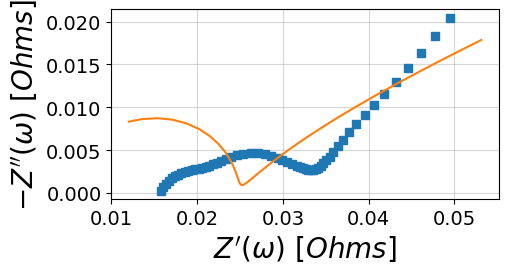

In [15]:
customConstantCircuit = CustomCircuit(initial_guess=[None, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01],
                                      constants={'R_0': 0},
                                      circuit='R_0-TDS_0')
customConstantCircuit.fit(frequencies, Z)

f_pred = np.logspace(5,-2)
customElementCircuit_fit = customConstantCircuit.predict(f_pred)
# plot_nyquist(customElementCircuit_fit, fmt='-.', ax=ax)
customConstantCircuit.plot(f_data = frequencies, Z_data = Z, kind='nyquist')
print(customConstantCircuit)
# plt.show()


Circuit string: R_0-TDS_0
Fit: False

Initial guesses:
    R_0 = 0.00e+00 [Ohm]
  TDS_0_0 = 1.00e-03 [Ohm-m^2]
  TDS_0_1 = 0.00e+00 [Ohm-m^2]
  TDS_0_2 = 5.00e-01 []
  TDS_0_3 = 1.90e-05 [sec]
  TDS_0_4 = 8.00e-02 [m^2]
  TDS_0_5 = 1.00e+03 [s]



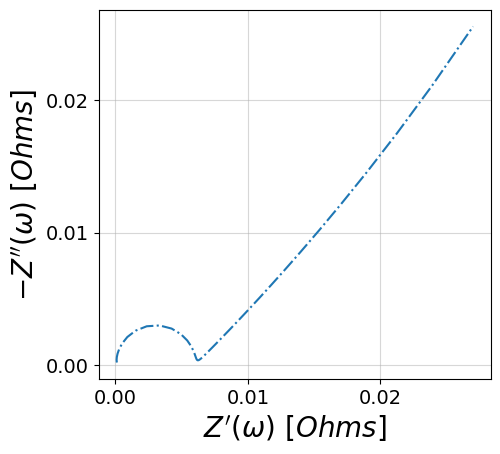

In [151]:
# Resistor, A, B, a, b, Aw, taoD

#tests:
#B = 0
# initial_guess=[0, 0.001, 0, 0.01, 0.001, 0.1, 10000] #no tail
# initial_guess=[0, 0.001, 0, 0.1, 0.001, 0.1, 10000] start of tail
#initial_guess=[0, 0.001, 0, 1, 0.001, 0.1, 10000] long tail
#initial_guess=[0, 0.001, 0, 0.1, 0.0000001, 0.1, 10000] eliminates most of circle, really only a tail
#initial_guess=[0, 0.001, 0, 0.5, 0.000019, 0.1, 10000] attempt at increasing b to have full semi circle and realistic a so tail is not too big ***

#initial_guess=[0, 0.001, 0, 0.5, 0.000019, 0.1, 100] increases curvature of tail
#initial_guess=[0, 0.001, 0, 0.1, 0.000019, 0.1, 100] increase curvature while decreasing horizontal width of tail using 'a'

# initial_guess=[0, 0.001, 0, 0.5, 0.000019, 0.001, 10000] increase semi circle area, but tail is not easily visible
# initial_guess=[0, 0.001, 0, 0.5, 0.000019, 1, 10000] 
# initial_guess=[0, 0.001, 0, 0.09, 0.000019, 1, 10000]

customConstantCircuit = CustomCircuit(initial_guess=[0, 0.001, 0, 0.5, 0.000019, 0.08, 1000],
                                      circuit='R_0-TDS_0')


#a = decreases semi circle area and increass tail length without changing shape of either as 'a' increases
#b = controls starting place of semi circle (smaller number means starts further to right --> will approach no circle and only tail when very small)
#tao D = controls curvature of tail / minimizes contribution by semi circle (as number approaches 0, the tail becomes bascially vertical)
#Aw = controls length of tail (length increases as Aw increases)

f_pred = np.logspace(5,-2)
customElementCircuit_fit = customConstantCircuit.predict(f_pred)
fix, ax = plt.subplots()
plot_nyquist(customElementCircuit_fit, fmt='-.', ax=ax)
print(customConstantCircuit)
plt.show()